In [47]:
%matplotlib inline
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams.update({'axes.titlesize': 'large'})
plt.rcParams.update({'axes.labelsize': 'large'})

def smart_convert(string):
    if " Hz" in string:
        return float(string.replace(" Hz", "e0"))
    elif " kHz" in string:
        return float(string.replace(" kHz", "e3"))
    elif " MHz" in string:
        return float(string.replace(" MHz", "e6"))
    elif " GHz" in string:
        return float(string.replace(" GHz", "e9"))
    elif "j" in string:
        return complex(string.replace(" ", "").replace("j", "") + "j")
    else:
        print('warning! smart_convert')
        return None
    
def complex_to_db(cmpx_number):
    if isinstance(cmpx_number, list):
        return [20.0 * math.log(math.sqrt(x.real**2 + x.imag**2), 10) for x in cmpx_number]
    else:
        return 20.0 * math.log(math.sqrt(cmpx_number.real**2 + cmpx_number.imag**2), 10)

def read_csv(filename, row_offset=3):
    data = []
    with open(filename, 'r') as f:
        reader = csv.reader(f)
        for i in range(0, row_offset):
            next(reader)
        for row in reader:
            row = [smart_convert(d) for d in row]
            data += [row]
    return data

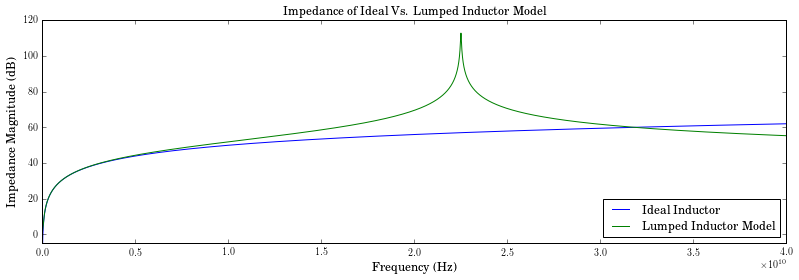

In [58]:
# format: freq, ideal inductor current, nonideal inductor current
inductor_data = read_csv('data/inductor_data.csv')
ideal_ind_impedance = [1.0/x[1] for x in inductor_data]
nonideal_ind_impedance = [1.0/x[2] for x in inductor_data]

width, height = plt.figaspect(0.3)
fig = plt.figure(figsize=(width,height))
plt.plot([x[0] for x in inductor_data], complex_to_db(ideal_ind_impedance))
plt.plot([x[0] for x in inductor_data], complex_to_db(nonideal_ind_impedance))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Impedance Magnitude (dB)')
plt.ylim([-5, 120])
plt.title('Impedance of Ideal Vs. Lumped Inductor Model')
plt.legend(['Ideal Inductor', 'Lumped Inductor Model'], loc='lower right')
plt.savefig('images/inductor_impedance.png', bbox_inches='tight', dpi=300)
plt.show()